<a href="https://colab.research.google.com/github/shekhar-banerjee96/ecg_covid19_heart_monitor/blob/main/ECG_COVID19_HeartMonitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Basic Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/ECG_COVID19.zip", 'r') as zObject:
# Extracting all the members of the zip into a specific location.
  zObject.extractall(path="/content/ECG_COVID19/")

In [4]:
print(os.getcwd())

train_path = os.getcwd() + '/ECG_COVID19/ECG_COVID19/'

train_path

/content


'/content/ECG_COVID19/ECG_COVID19/'

In [5]:
abnormal_HB = len(os.listdir(os.path.join(train_path,"Abnormal_Heart_Beat")))
covid19 = len(os.listdir(os.path.join(train_path,"Covid19_Patients")))
mi_history = len(os.listdir(os.path.join(train_path,"MI_History")))
myocardial = len(os.listdir(os.path.join(train_path,"Myocardial")))
normal = len(os.listdir(os.path.join(train_path,"Normal")))

abnormal_HB , covid19 , mi_history , myocardial , normal

(546, 250, 203, 74, 859)

#### The Dataset is imbalanced for myocardial class



In [6]:
labels = ['Normal','Covid19','Myocardial','MI_History','Abnormal_Heart_Beat']
counts = [abnormal_HB , covid19 , mi_history , myocardial , normal]

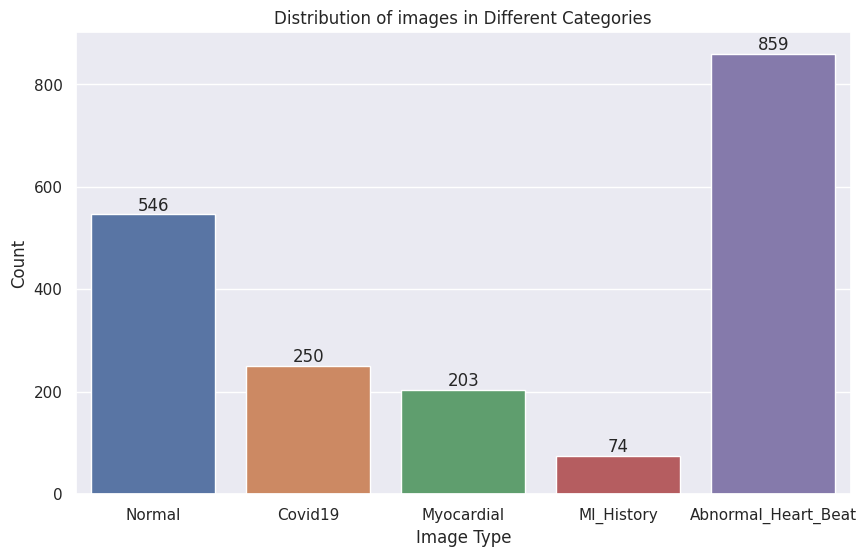

In [7]:
plt.figure(figsize = (10,6))

ax = sns.barplot(x = labels , y = counts,hue = labels)

for i in ax.containers:
  ax.bar_label(i);

plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Distribution of images in Different Categories')
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go

In [9]:
fig = px.bar(x=labels , y = counts,color = labels)
fig.update_layout(xaxis_title = "Image_type",
                  yaxis_title = 'counts',
                  title = 'Distribution of Images in Different Categories')

fig.show()

In [10]:
fig = go.Figure(data = [go.Pie(labels = labels ,
                            values = counts ,
                            textinfo='percent',
                            insidetextorientation='radial')])
fig.update_layout(xaxis_title = "Image_type",
                  yaxis_title = 'counts',
                  title = 'Distribution of Images in Different Categories')

fig.show()

In [11]:
! pip install opencv-python

In [12]:
import cv2

### Define Variables for File Path

In [13]:
abnormal_HB_file_path = os.path.join(train_path,"Abnormal_Heart_Beat")
covid19_file_path = os.path.join(train_path,"Covid19_Patients")
mi_history_file_path = os.path.join(train_path,"MI_History")
myocardial_file_path = os.path.join(train_path,"Myocardial")
normal_file_path = os.path.join(train_path,"Normal")

## Extract file names from the folders

In [14]:
abnormal_HB = os.listdir(os.path.join(train_path,"Abnormal_Heart_Beat"))
covid19 = os.listdir(os.path.join(train_path,"Covid19_Patients"))
mi_history = os.listdir(os.path.join(train_path,"MI_History"))
myocardial = os.listdir(os.path.join(train_path,"Myocardial"))
normal = os.listdir(os.path.join(train_path,"Normal"))

In [15]:
abnormal_HB[:5]

['HB   (14).jpg',
 'HB   (150).jpg',
 'HB (386).jpg',
 'HB (211).jpg',
 'HB (381).jpg']

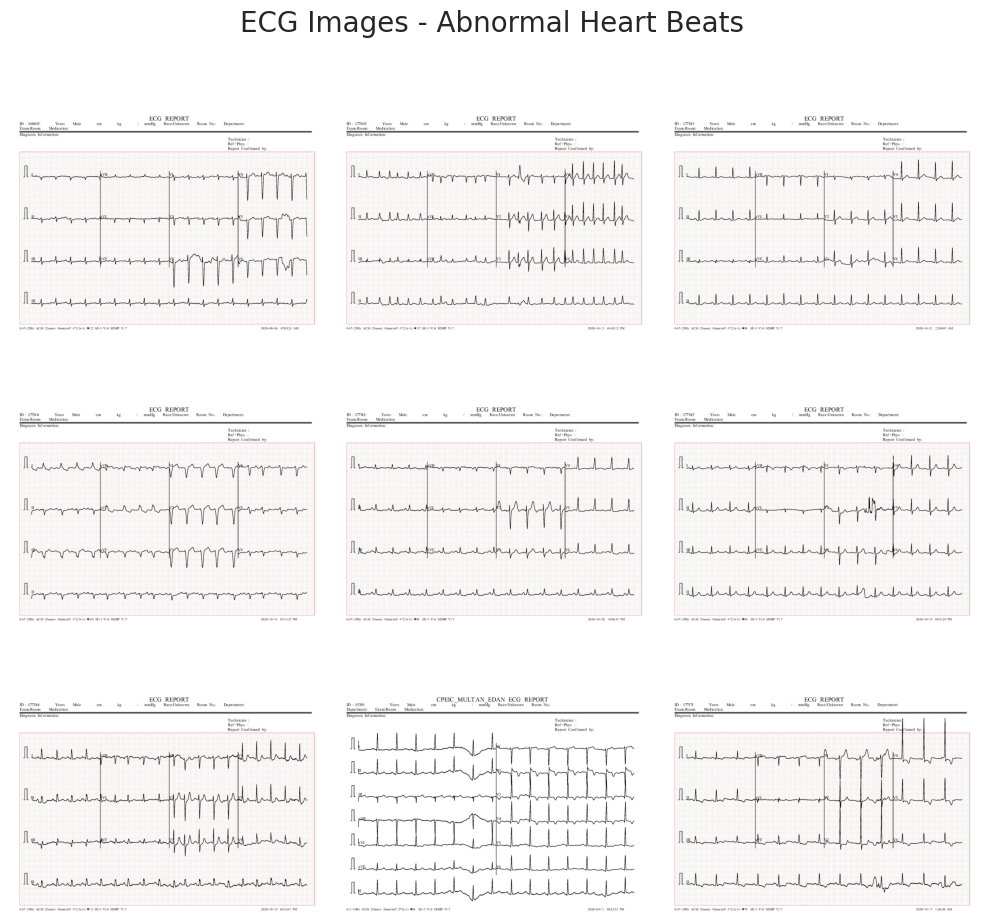

In [16]:
fig ,axes = plt.subplots(3,3,figsize = (10,10))
fig.suptitle('ECG Images - Abnormal Heart Beats',fontsize = 20)
axes = axes.ravel()

for i in range(9):

  img = cv2.imread(os.path.join(abnormal_HB_file_path,abnormal_HB[i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

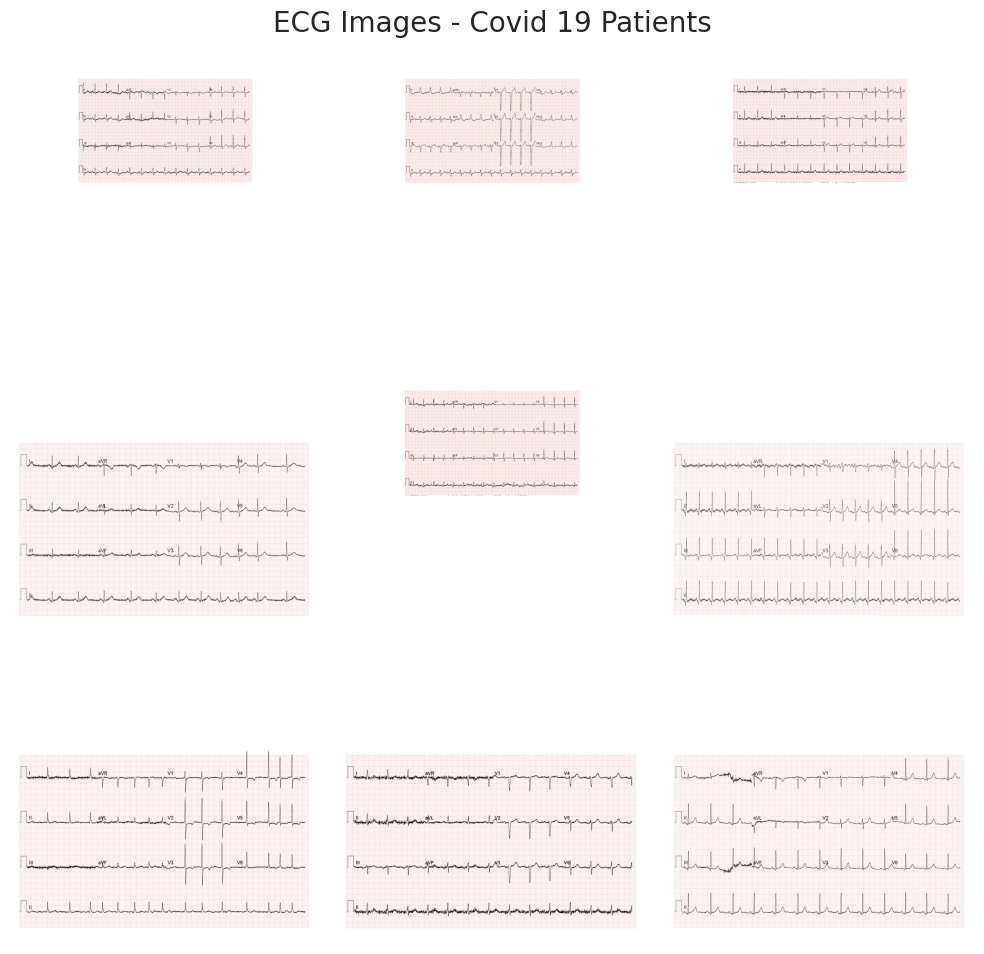

In [17]:
fig ,axes = plt.subplots(3,3,figsize = (10,10))
fig.suptitle('ECG Images - Covid 19 Patients',fontsize = 20)
axes = axes.ravel()

for i in range(9):

  img = cv2.imread(os.path.join(covid19_file_path,covid19[i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

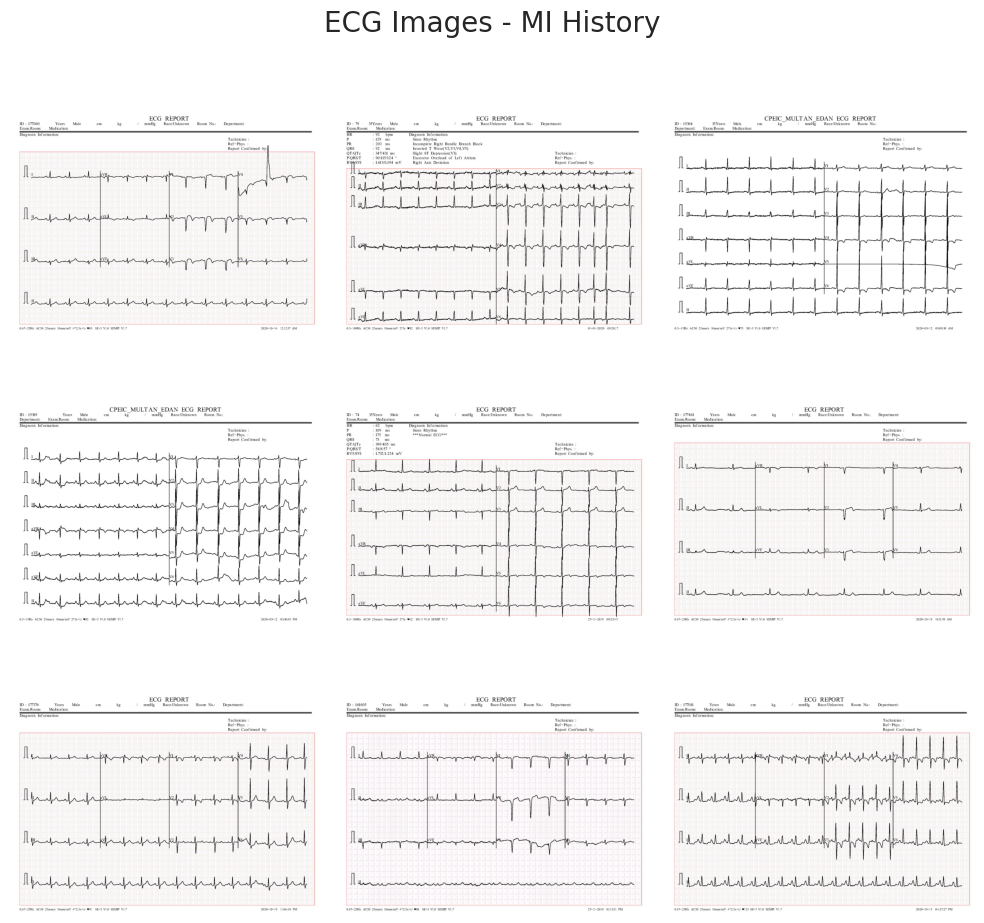

In [18]:
fig ,axes = plt.subplots(3,3,figsize = (10,10))
fig.suptitle('ECG Images - MI History',fontsize = 20)
axes = axes.ravel()

for i in range(9):

  img = cv2.imread(os.path.join(mi_history_file_path,mi_history[i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

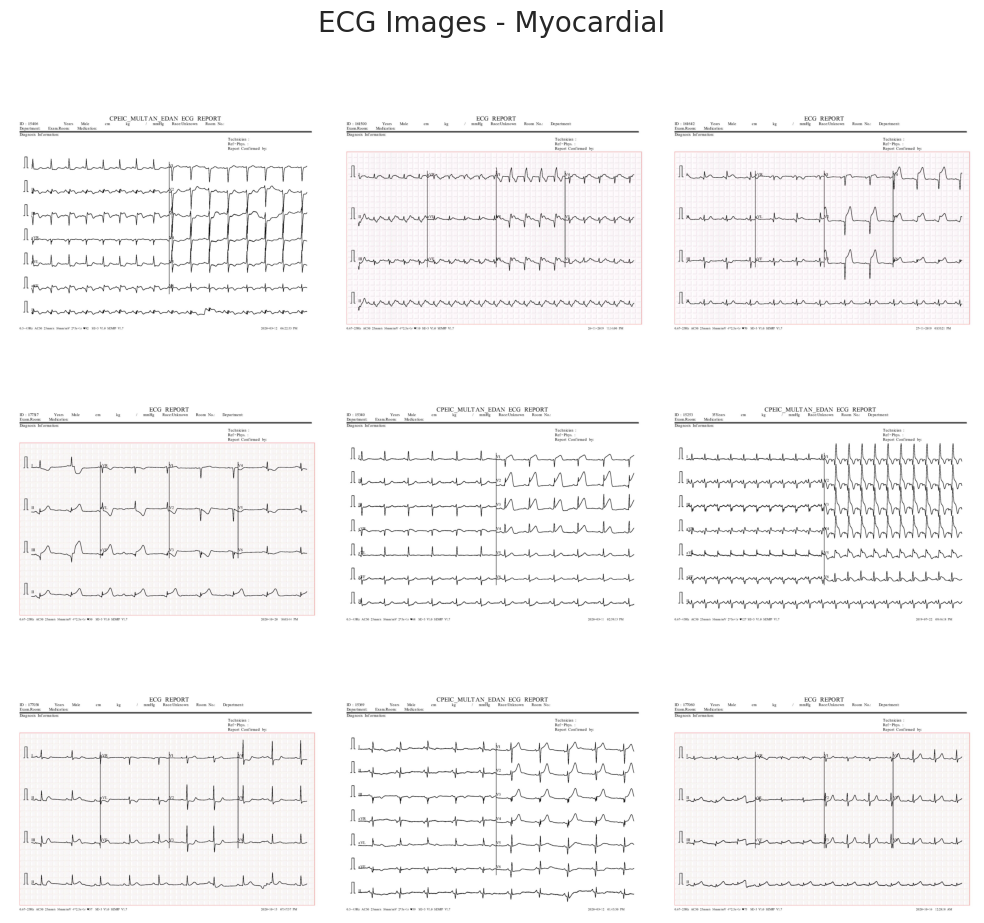

In [19]:
fig ,axes = plt.subplots(3,3,figsize = (10,10))
fig.suptitle('ECG Images - Myocardial',fontsize = 20)
axes = axes.ravel()

for i in range(9):

  img = cv2.imread(os.path.join(myocardial_file_path,myocardial[i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

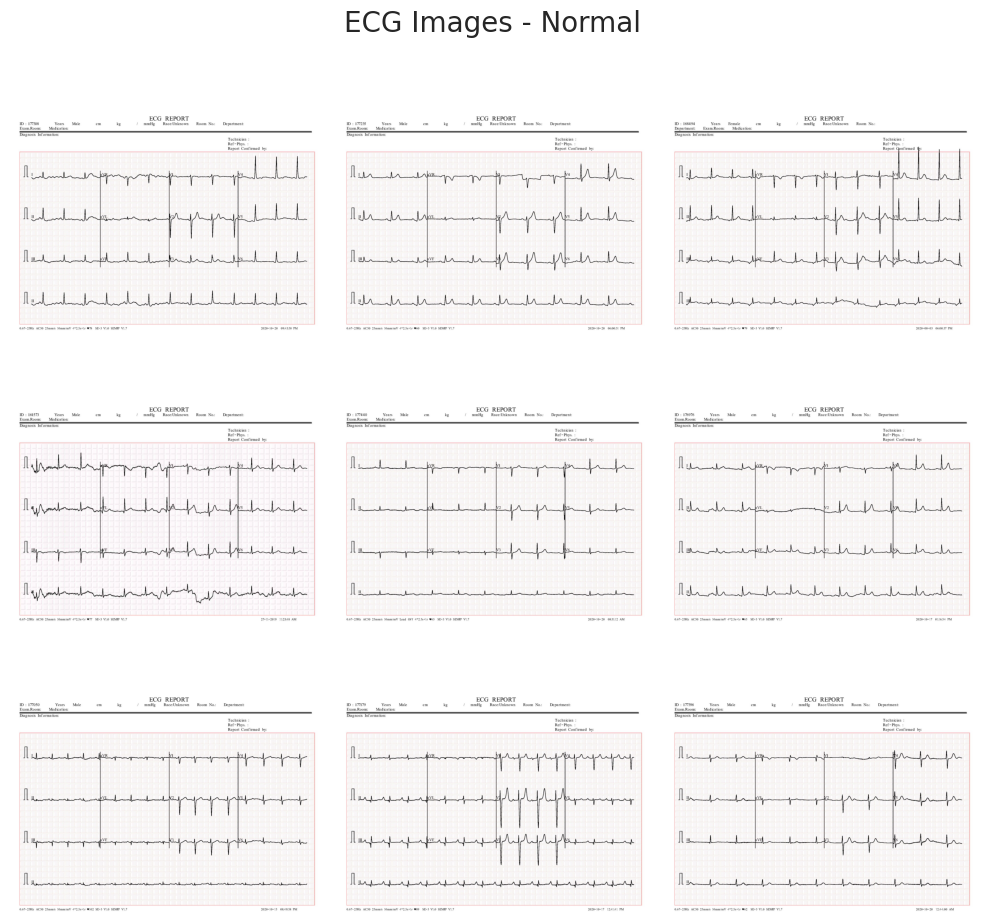

In [20]:
fig ,axes = plt.subplots(3,3,figsize = (10,10))
fig.suptitle('ECG Images - Normal',fontsize = 20)
axes = axes.ravel()

for i in range(9):

  img = cv2.imread(os.path.join(normal_file_path,normal[i]))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [21]:
def load_and_preprocess_images(image_folder):
  image_files = os.listdir(image_folder)
  images = []

  for image_file in image_files:
    image = cv2.imread(os.path.join(image_folder,image_file))
    if image is not None :
      image = cv2.resize(image,(128,128))
      images.append(image)
  return images

#### Preprocess the files to make them all of one shape , to be able to put them in the prediction models

In [22]:
abnormal_files = load_and_preprocess_images(abnormal_HB_file_path)
covid19_files = load_and_preprocess_images(covid19_file_path)
prev_mi_files = load_and_preprocess_images(mi_history_file_path)
mi_files = load_and_preprocess_images(myocardial_file_path)
normal_files = load_and_preprocess_images(normal_file_path)

#### Reshape them to the input shape of the model

In [23]:
abnormal_files = np.array(abnormal_files).reshape(-1,128,128,3)
covid19_files = np.array(covid19_files).reshape(-1,128,128,3)
prev_mi_files = np.array(prev_mi_files).reshape(-1,128,128,3)
mi_files = np.array(mi_files).reshape(-1,128,128,3)
normal_files = np.array(normal_files).reshape(-1,128,128,3)

## Merge the files to a single dataset , X and Y

- x : Input Features
- y : Labels

In [24]:
all_files = np.concatenate((abnormal_files,covid19_files,prev_mi_files,mi_files,normal_files))

all_labels = np.concatenate((
                            np.zeros(len(abnormal_files)),
                            np.ones(len(covid19_files)),
                            np.ones(len(mi_history))*2,
                            np.ones(len(myocardial))*3,
                            np.ones(len(normal))*4
                          ))

In [25]:
all_files.shape , all_labels.shape

((1932, 128, 128, 3), (1932,))

In [26]:
all_files_flat = all_files.reshape(-1,all_files.shape[1]*all_files.shape[2]*all_files.shape[3])

In [27]:
all_files_flat.shape

(1932, 49152)

In [28]:
import imblearn
from imblearn.over_sampling import SMOTE

In [29]:
ros = SMOTE(random_state=42)

all_files_flat_resampled , all_labels_resampled = ros.fit_resample(all_files_flat,all_labels)

In [30]:
all_files_flat_resampled.shape , all_labels_resampled.shape

((4295, 49152), (4295,))

In [31]:
res = {key: list(all_labels_resampled).count(key) for key in set(all_labels_resampled)}

# printing result
print("Lists elements Frequency : " + str(res))

Lists elements Frequency : {0.0: 859, 1.0: 859, 2.0: 859, 3.0: 859, 4.0: 859}


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [34]:
x_train , x_test , y_train , y_test = train_test_split(all_files_flat_resampled,all_labels_resampled,test_size = 0.2,random_state = 42)

In [40]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [81]:
svm = SVC(random_state=42).fit(x_train_scaled,y_train)

In [83]:
svm_predictions = svm.predict(x_test_scaled)

In [84]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       176
         1.0       1.00      0.96      0.98       170
         2.0       0.98      0.77      0.87       162
         3.0       0.99      0.92      0.95       161
         4.0       0.74      0.88      0.80       190

    accuracy                           0.86       859
   macro avg       0.88      0.86      0.87       859
weighted avg       0.88      0.86      0.86       859



In [85]:
print(confusion_matrix(y_test,svm_predictions))

[[135   0   1   1  39]
 [  6 163   1   0   0]
 [ 20   0 125   0  17]
 [  9   0   0 148   4]
 [ 23   0   0   0 167]]


In [86]:
print(accuracy_score(y_test,svm_predictions))

0.8591385331781141


In [36]:
! pip install scikit-plot

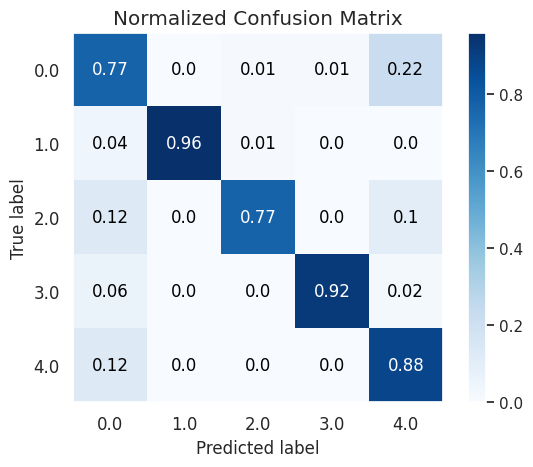

In [91]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, svm_predictions, normalize=True)
plt.show()

### Checking with RandomForest

In [92]:
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

rf_predictions = rf_classifier.predict(x_test_scaled)

In [93]:
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy", accuracy)

report  = classification_report(y_test, rf_predictions)
print("classification_report :\n", report)

confusion = confusion_matrix(y_test, rf_predictions)
print("confusion_matrix :\n", confusion)

Accuracy 0.8626309662398137
classification_report :
               precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       176
         1.0       0.99      0.96      0.98       170
         2.0       0.90      0.83      0.87       162
         3.0       0.97      0.93      0.95       161
         4.0       0.72      0.93      0.81       190

    accuracy                           0.86       859
   macro avg       0.88      0.86      0.87       859
weighted avg       0.87      0.86      0.86       859

confusion_matrix :
 [[116   1  11   2  46]
 [  1 164   3   1   1]
 [  9   0 135   1  17]
 [  5   0   0 150   6]
 [ 13   0   1   0 176]]


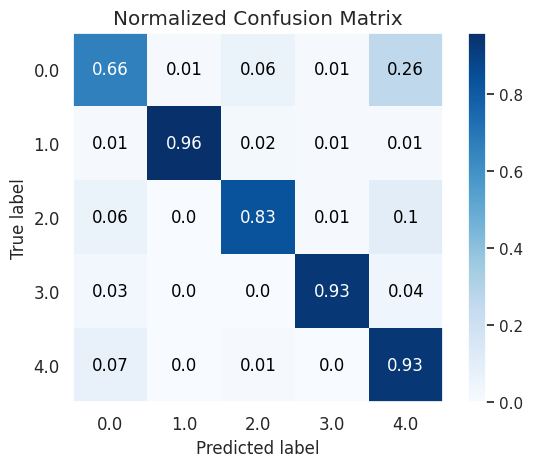

In [94]:
skplt.metrics.plot_confusion_matrix(y_test, rf_predictions, normalize=True)
plt.show()

## Deep Learning

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

import scikitplot as skplt

## MultiLayer Perceptron / Deep Neural Network / Artificial Neural Network

In [41]:
x_train_scaled.shape

(3436, 49152)

In [42]:
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
86/86 [==============================] - 16s 174ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6114 - val_accuracy: 0.1657
Epoch 2/20
86/86 [==============================] - 14s 162ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6113 - val_accuracy: 0.1657
Epoch 3/20
86/86 [==============================] - 13s 150ms/step - loss: 1.6092 - accuracy: 0.2071 - val_loss: 1.6114 - val_accuracy: 0.1657
Epoch 4/20
86/86 [==============================] - 10s 111ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6116 - val_accuracy: 0.1657
Epoch 5/20
86/86 [==============================] - 10s 121ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6114 - val_accuracy: 0.1657
Epoch 6/20
86/86 [==============================] - 11s 131ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6114 - val_accuracy: 0.1657
Epoch 7/20
86/86 [==============================] - 16s 182ms/step - loss: 1.6093 - accuracy: 0.2071 - val_loss: 1.6116 - val_accuracy: 0.1657

Due to high number of features , its not possible to impove the DNN Model.  
We should use CNN to improve this.

## CNN Algorithm

In [43]:
from keras.layers import Conv2D, MaxPooling2D

In [44]:
x_train_CNN = x_train_scaled.reshape(-1, 128,128,3)
x_train_CNN.shape

(3436, 128, 128, 3)

In [ ]:
x_test_CNN = x_test_scaled.reshape(-1, 128,128,3)
x_test_CNN.shape

In [56]:
# CNN
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# DNN

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_CNN, y_train, epochs=30, batch_size=32, validation_data = (x_test_CNN,y_test))

Epoch 1/30
108/108 [==============================] - 5s 31ms/step - loss: 1.5960 - accuracy: 0.2404 - val_loss: 1.3889 - val_accuracy: 0.4482
Epoch 2/30
108/108 [==============================] - 2s 22ms/step - loss: 1.1591 - accuracy: 0.4747 - val_loss: 1.1246 - val_accuracy: 0.4203
Epoch 3/30
108/108 [==============================] - 2s 22ms/step - loss: 0.9352 - accuracy: 0.5725 - val_loss: 0.8178 - val_accuracy: 0.6310
Epoch 4/30
108/108 [==============================] - 3s 24ms/step - loss: 0.7766 - accuracy: 0.6688 - val_loss: 0.6666 - val_accuracy: 0.7218
Epoch 5/30
108/108 [==============================] - 2s 22ms/step - loss: 0.6288 - accuracy: 0.7680 - val_loss: 0.5022 - val_accuracy: 0.7963
Epoch 6/30
108/108 [==============================] - 2s 22ms/step - loss: 0.5153 - accuracy: 0.8079 - val_loss: 0.4602 - val_accuracy: 0.8324
Epoch 7/30
108/108 [==============================] - 2s 22ms/step - loss: 0.4036 - accuracy: 0.8510 - val_loss: 0.3800 - val_accuracy: 0.8556

### So Using CNN , we could achieve :

- Training Accuracy : 99 %
- Test Accuracy : 89 %